In [1]:
import pandas as pd
import pytz
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Some preprocessing
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import preprocessing


In [2]:
weather = pd.read_csv('weather_features.csv',header='infer')
df = pd.DataFrame(weather)



In [3]:
#Pre-processign REMOVE INNECESARY DATA -->  weather_id, weather_icon,
df = df.drop('weather_id', axis = 1)
df = df.drop('weather_icon', axis = 1)

In [4]:
# Creación de un DataFrame de ejemplo (reemplázalo con tu DataFrame real)

df['dt_iso'] = pd.to_datetime(df['dt_iso'], format='%Y-%m-%d %H:%M:%S', utc=True)  # Convertir la columna a tipo datetime

# Separar la columna de fecha en cuatro columnas
df['year'] = df['dt_iso'].dt.year
df['month'] = df['dt_iso'].dt.month
df['day'] = df['dt_iso'].dt.day
df['hour'] = df['dt_iso'].dt.hour

map_month = {1: '01', 2: '02', 3: '03', 4: '04', 5:'05',6: '06', 7: '07', 8: '08', 9: '09', 10: '10', 11: '11', 12: '12'}
df['month'] = df['month'].map(map_month)

df['ID'] = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['city_name']
df = df.drop('year', axis = 1)
df = df.drop('month', axis = 1)
df = df.drop('city_name', axis = 1)
df = df.drop('dt_iso', axis = 1)





In [5]:
col3 = ['hour'] + [col3 for col3 in df.columns if col3 != 'hour']
df = df[col3]
col2 = ['day'] + [col2 for col2 in df.columns if col2 != 'day']
df = df[col2]
col1 = ['ID'] + [col1 for col1 in df.columns if col1 != 'ID']
df = df[col1]
df

,ID,day,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_main,weather_description
0,2015-01-Valencia,1,0,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,clear,sky is clear
1,2015-01-Valencia,1,1,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,clear,sky is clear
2,2015-01-Valencia,1,2,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
3,2015-01-Valencia,1,3,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
4,2015-01-Valencia,1,4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-Seville,31,19,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,clear,sky is clear
178392,2018-12-Seville,31,20,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,clear,sky is clear
178393,2018-12-Seville,31,21,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,clear,sky is clear
178394,2018-12-Seville,31,22,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,clear,sky is clear


In [6]:
#REDONDEAR y CAMBIAR A CELSIUS
df['temp'] = df['temp'] - 273
df['temp'] = df['temp'].round(1)
df['temp_max'] = df['temp_max'] - 273
df['temp_max'] = df['temp_max'].round(1)
df['temp_min'] = df['temp_min'] - 273
df['temp_min'] = df['temp_min'].round(1)
df

,ID,day,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_main,weather_description
0,2015-01-Valencia,1,0,-2.5,-2.5,-2.5,1001,77,1,62,0.0,0.0,0.0,0,clear,sky is clear
1,2015-01-Valencia,1,1,-2.5,-2.5,-2.5,1001,77,1,62,0.0,0.0,0.0,0,clear,sky is clear
2,2015-01-Valencia,1,2,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
3,2015-01-Valencia,1,3,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
4,2015-01-Valencia,1,4,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,clear,sky is clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-Seville,31,19,14.8,14.1,15.1,1028,54,3,30,0.0,0.0,0.0,0,clear,sky is clear
178392,2018-12-Seville,31,20,12.8,12.1,13.1,1029,62,3,30,0.0,0.0,0.0,0,clear,sky is clear
178393,2018-12-Seville,31,21,12.1,12.1,12.1,1028,58,4,50,0.0,0.0,0.0,0,clear,sky is clear
178394,2018-12-Seville,31,22,11.1,11.1,11.1,1029,57,4,60,0.0,0.0,0.0,0,clear,sky is clear


In [7]:
#DIRECCION DEL AIRE

#limites = [0, 45, 90, 135, 180, 225, 270, 315, 360]
#etiquetas = ['N', 'NW', 'W', 'SW', 'S', 'SO', 'O', 'NO']  # Etiquetas para cada intervalo

# Utilizar pd.cut() para asignar etiquetas a los intervalos
#df['wind_deg'] = pd.cut(df['wind_deg'], bins=limites, labels=etiquetas, right=False)
#RENAME
#df.rename(columns={'wind_deg': 'wind_dir'}, inplace=True)
#df


AHORA VAMOS A ASIGNAR VALORES NÚMERICOS:
Weather_description:
(1:sky is clear,
 2:few clouds, 
 3:broken clouds, 
 4:scattered clouds, 
 5:light rain)

 Weather_main:
 (1: clear, 
  2:clouds, 
  3:rain, 
  4:mist, 
  5:fog)

In [8]:

map_Desc = {'sky is clear': 1, 'few clouds': 2, 'broken clouds': 3, 'scattered clouds': 4, 'ligth rain': 5}
map_main = {'clear': 1, 'clouds': 2, 'rain': 3, 'mist': 4, 'fog': 5}

# Asignar números a la columna utilizando map
df['weather_desc'] = df['weather_description'].map(map_Desc)
df['weather_map_main'] = df['weather_main'].map(map_main)
df = df.drop('weather_description', axis = 1)
df = df.drop('weather_main', axis = 1)
df

,ID,day,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_desc,weather_map_main
0,2015-01-Valencia,1,0,-2.5,-2.5,-2.5,1001,77,1,62,0.0,0.0,0.0,0,1.0,1.0
1,2015-01-Valencia,1,1,-2.5,-2.5,-2.5,1001,77,1,62,0.0,0.0,0.0,0,1.0,1.0
2,2015-01-Valencia,1,2,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,1.0,1.0
3,2015-01-Valencia,1,3,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,1.0,1.0
4,2015-01-Valencia,1,4,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-Seville,31,19,14.8,14.1,15.1,1028,54,3,30,0.0,0.0,0.0,0,1.0,1.0
178392,2018-12-Seville,31,20,12.8,12.1,13.1,1029,62,3,30,0.0,0.0,0.0,0,1.0,1.0
178393,2018-12-Seville,31,21,12.1,12.1,12.1,1028,58,4,50,0.0,0.0,0.0,0,1.0,1.0
178394,2018-12-Seville,31,22,11.1,11.1,11.1,1029,57,4,60,0.0,0.0,0.0,0,1.0,1.0


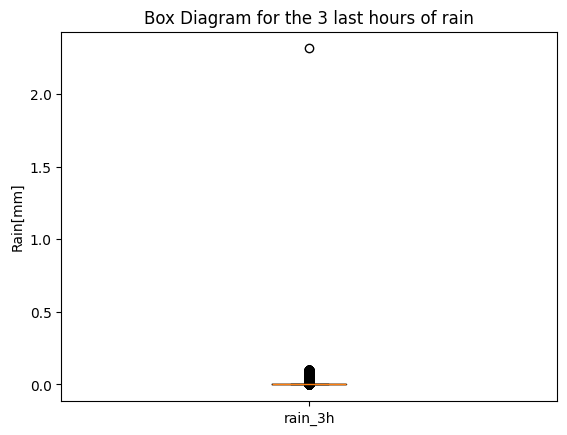

In [9]:
# Crear el diagrama de caja
fig, ax = plt.subplots()
ax.boxplot(df['rain_3h'])

# Agregar etiquetas y título
ax.set_xticklabels(['rain_3h'])
ax.set_ylabel('Rain[mm]')
ax.set_title('Box Diagram for the 3 last hours of rain')

# Mostrar el diagrama de caja
plt.show()

<Axes: xlabel='temp', ylabel='temp_max'>

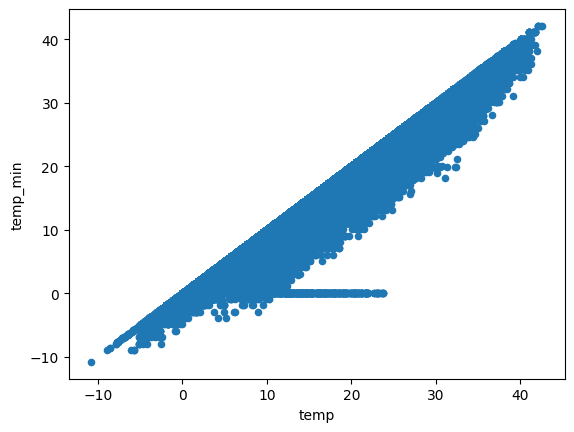

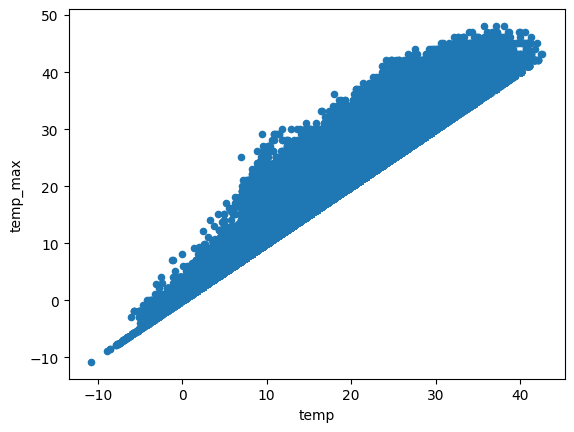

In [10]:
df.plot.scatter(x='temp',y='temp_min')
df.plot.scatter(x='temp',y='temp_max')


In [11]:
df = df.drop('temp_min',axis=1)
df = df.drop('temp_max',axis=1)
df = df.drop('rain_3h',axis=1)
df

,ID,day,hour,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all,weather_desc,weather_map_main
0,2015-01-Valencia,1,0,-2.5,1001,77,1,62,0.0,0.0,0,1.0,1.0
1,2015-01-Valencia,1,1,-2.5,1001,77,1,62,0.0,0.0,0,1.0,1.0
2,2015-01-Valencia,1,2,-3.3,1002,78,0,23,0.0,0.0,0,1.0,1.0
3,2015-01-Valencia,1,3,-3.3,1002,78,0,23,0.0,0.0,0,1.0,1.0
4,2015-01-Valencia,1,4,-3.3,1002,78,0,23,0.0,0.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-Seville,31,19,14.8,1028,54,3,30,0.0,0.0,0,1.0,1.0
178392,2018-12-Seville,31,20,12.8,1029,62,3,30,0.0,0.0,0,1.0,1.0
178393,2018-12-Seville,31,21,12.1,1028,58,4,50,0.0,0.0,0,1.0,1.0
178394,2018-12-Seville,31,22,11.1,1029,57,4,60,0.0,0.0,0,1.0,1.0


In [12]:

#results = df.groupby(['ID'])[['temp', 'pressure','humidity','wind_speed','rain_1h','snow_3h']].mean().reset_index()

results = df.groupby('ID').agg({
    'temp': 'mean',
    'pressure': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',  # Aplicar mediana a 'wind_speed'
    'rain_1h': 'mean',     # Aplicar mediana a 'rain_1h'
    'snow_3h': 'mean',
    'clouds_all': 'mean',
    'weather_desc': 'median',
    'weather_map_main' : 'median'
}).reset_index()
results.to_csv('groupby.csv')
results

,ID,temp,pressure,humidity,wind_speed,rain_1h,snow_3h,clouds_all,weather_desc,weather_map_main
0,2015-01- Barcelona,11.357258,1017.580645,63.391129,2.311828,0.086694,0.000000,20.833333,1.0,1.0
1,2015-01-Bilbao,5.115591,1023.333333,86.567204,1.641129,0.510081,0.097278,52.267473,2.0,2.0
2,2015-01-Madrid,2.062769,968.692204,75.811828,2.177419,0.033468,0.000000,22.033602,1.0,1.0
3,2015-01-Seville,8.447984,1031.845430,82.567204,2.982527,0.054032,0.000000,22.663978,1.0,1.0
4,2015-01-Valencia,8.780671,1016.240268,63.118121,4.723490,0.013691,0.000000,16.064430,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
235,2018-12- Barcelona,10.090763,1023.548862,75.070950,3.989290,0.004819,0.000000,13.040161,1.0,1.0
236,2018-12-Bilbao,8.797906,1025.061518,77.770942,2.018325,0.034162,0.000000,34.146597,2.0,2.0
237,2018-12-Madrid,6.417126,1026.426347,84.464671,1.449102,0.024790,0.000000,34.136527,1.0,2.0
238,2018-12-Seville,11.376333,1025.959688,79.091027,2.037711,0.017165,0.000000,10.590377,1.0,1.0


K - Means method:
K-means is a clustering algorithm that searches for k centroids (k being the number of clusters) that are, at most, at a certain distance from every point inside the cluster. It is very sensitive to parameters of different dimension size and, because of that, we will normalize all the values.

agrupar datos en k grupos distintos basados en características similares. busca encontrar k grupos que minimicen la variación interna dentro de cada grupo y maximicen la variación entre los diferentes grupos. -->

Inicialización: Comienza con la selección aleatoria de k centroides (puntos centrales de los clusters).

Asignación: Asigna cada dato al centroide más cercano, formando k grupos.

Actualización del centroide: Calcula nuevos centroides para cada grupo tomando la media de todos los puntos asignados a ese grupo.

Repetición: Itera los pasos 2 y 3 hasta que los centroides ya no cambien significativamente o se alcance un número predefinido de iteraciones.

In [13]:
#NORMALIZACIÓN
kmeans_weather = results

kmeans_weather['temp'] = kmeans_weather['temp']/kmeans_weather['temp'].abs().max()
kmeans_weather['pressure'] = kmeans_weather['pressure']/kmeans_weather['pressure'].abs().max()
kmeans_weather['humidity'] = kmeans_weather['humidity']/kmeans_weather['humidity'].abs().max()
kmeans_weather['wind_speed'] = kmeans_weather['wind_speed']/kmeans_weather['wind_speed'].abs().max()
kmeans_weather['rain_1h'] = kmeans_weather['rain_1h']/kmeans_weather['rain_1h'].abs().max()
kmeans_weather['snow_3h'] = kmeans_weather['snow_3h']/kmeans_weather['snow_3h'].abs().max()
kmeans_weather['clouds_all'] = kmeans_weather['clouds_all']/kmeans_weather['clouds_all'].abs().max()

#observamos que solo tenemos 3 valores al normalizar ya que anteriormente hacemos la mediana y no la media
kmeans_weather['weather_desc'] = kmeans_weather['weather_desc']/kmeans_weather['weather_desc'].abs().max()
kmeans_weather['weather_map_main'] = kmeans_weather['weather_map_main']/kmeans_weather['weather_map_main'].abs().max()
kmeans_weather.to_csv('kmeans_weather.csv')
kmeans_weather


,ID,temp,pressure,humidity,wind_speed,rain_1h,snow_3h,clouds_all,weather_desc,weather_map_main
0,2015-01- Barcelona,0.348079,0.067402,0.645690,0.390339,0.062016,0.000000,0.292324,0.333333,0.333333
1,2015-01-Bilbao,0.156783,0.067783,0.881757,0.277095,0.364886,0.090755,0.733395,0.666667,0.666667
2,2015-01-Madrid,0.063220,0.064164,0.772205,0.367645,0.023941,0.000000,0.309166,0.333333,0.333333
3,2015-01-Seville,0.258915,0.068347,0.841013,0.503582,0.038652,0.000000,0.318011,0.333333,0.333333
4,2015-01-Valencia,0.269111,0.067313,0.642909,0.797534,0.009794,0.000000,0.225409,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...
235,2018-12- Barcelona,0.309263,0.067797,0.764658,0.673569,0.003447,0.000000,0.182974,0.333333,0.333333
236,2018-12-Bilbao,0.269640,0.067898,0.792160,0.340782,0.024438,0.000000,0.479130,0.666667,0.666667
237,2018-12-Madrid,0.196673,0.067988,0.860341,0.244672,0.017734,0.000000,0.478989,0.333333,0.666667
238,2018-12-Seville,0.348664,0.067957,0.805606,0.344056,0.012279,0.000000,0.148600,0.333333,0.333333


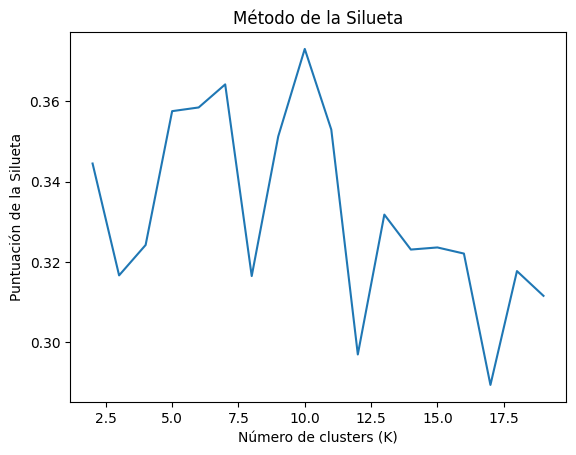

In [18]:
# Seleccionar solo las columnas numéricas
numeric_cols = kmeans_weather.select_dtypes(include='number')

silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=400, n_init=10, random_state=0)
    kmeans.fit(numeric_cols)
    silhouette_scores.append(silhouette_score(numeric_cols, kmeans.labels_))

# Graficar el método de la silueta
plt.plot(range(2, 20), silhouette_scores)
plt.title('Método de la Silueta')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Puntuación de la Silueta')
plt.show()

In [30]:
from sklearn import cluster
#CLUSTER PARA FORMAR 12 GRUPOS CON PARÁMETROS PARECIDOS ENTRE CIUDADES Y MESES
#K-means just work on relevant features
data_cluster = results.drop('ID',axis=1) 
data_numeric = results.select_dtypes(include=['number'])

# Calculation 6 clusters
k_means = cluster.KMeans(n_clusters=10, max_iter=20, random_state=1) #Se configura el algoritmo: identificar 7 grupos, 20 nº max. de iteraciones, random_state=1 establece una semilla aleatoria para la reproducibilidad de los resultados. 
k_means.fit(data_numeric) # Ajusta el modelo K-means

labels = k_means.labels_ #Etiqueta
cluster_results = pd.DataFrame(labels, index=results.ID, columns=['Cluster ID']) #utilizando estas etiquetas, indexando las filas con los valores de la columna 'Place' del conjunto de datos original y etiquetando la columna como 'Cluster ID'.
cluster_results.to_csv('cluster_results.csv')
cluster_results
#EXPLICAR DESPUES QUE CIUDADES Y MESES SE PARECEN

c:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster ID
ID,
2015-01- Barcelona,0
2015-01-Bilbao,1
2015-01-Madrid,0
2015-01-Seville,0
2015-01-Valencia,0
...,...
2018-12- Barcelona,0
2018-12-Bilbao,1
2018-12-Madrid,4


In [31]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data_cluster.columns)


,temp,pressure,humidity,wind_speed,rain_1h,snow_3h,clouds_all,weather_desc,weather_map_main
0,0.383869,0.067452,0.721617,0.426305,0.035930,2.666573e-05,0.244660,0.333333,0.333333
1,0.336231,0.067501,0.793481,0.352192,0.097948,5.041955e-03,0.562615,0.666667,0.685185
2,0.761445,0.067187,0.497366,0.402068,0.013993,3.469447e-18,0.126834,0.333333,0.333333
3,0.745123,0.067314,0.682383,0.436607,0.037970,-2.602085e-18,0.283912,0.613333,0.666667
4,0.373848,0.067310,0.787059,0.360914,0.075476,1.799797e-03,0.454909,0.333333,0.686869
5,0.296320,1.000000,0.529344,0.512563,0.232489,0.000000e+00,0.391631,0.333333,0.666667
6,0.421677,0.067353,0.814664,0.372576,0.064353,1.912614e-04,0.690783,1.000000,0.666667
7,0.373677,0.067046,0.712513,0.651298,0.053757,3.569941e-04,0.393654,0.619048,0.666667
8,0.147540,0.067511,0.921073,0.310050,0.521503,1.000000e+00,1.000000,0.666667,1.000000
9,0.562552,0.067281,0.733839,0.375698,0.093994,-2.602085e-18,0.409423,0.659091,0.666667


DBSCAN and K-Means Method's comparison:

In this section we will compare, visually, the performance of two clustering techniques. For us to be able to check the performance, we will just use two parameters : the mean temperature and the humidity's levels since, from our point of view, they can together describe useful conditions of the weather

In [ ]:

#Get just a 2D dataFrame to enable visualization
data = results.drop(['temp','pressure','humidity','wind_speed','snow_3h','weather_desc','weather_map_main'],axis=1)
